https://dreamlog.tistory.com/576

# 결정 트리(decision tree)
#### 일련의 질문에 대한 결정을 통해 데이터를 분해하는 모델

트리의 루트(root)에서 시작해서 정보 이득(information Gain, IG)이 최대가 되는 특성으로 데이터를 나눈다.

반복 과정을 통해 리프 노드(leaf node)가 순수해질 때까지 모든 자식 노드에서 분할 작업을 반복한다.

즉 , 이 노드의 모든 샘플의 동일한 클래스에 속하고 실제로 이렇게 하면 노드가 많이 깊은 트리가 만들어지고 과대적합될 가능성이 높다.

일반적으로 트리의 최대 깊이를 제한하여 트리를 가지치기(pruning)한다.

# 정보 이득 최대화: 자원을 최대로 활용

가장 정보가 풍부한 특성으로 노드를 나누기 위해 트리 알고리즘으로 최적화할 목적 함수를 정의

목적 함수는 각 분할에서 정보 이득을 최대화한다.

정보 이득은 단순히 부모 노드의 불순도와 자식 노드의 불순도 합의 차이


# 불순도 지표 or 분할 조건

지니 불순도 측정(Gini Impurity Measure): Classification Problem에서 사용 가능한 결정 트리(Decision Tree)의 분할 기준 (Split Criteria) 중 하나이다. 지니 불순도는 클래스가 완벽하게 섞여 있을 때 최대가 된다.
1. 지니 불순도 측정치가 결정 트리에서 사용되는 방법과는 독립적으로 다양한 각도에서 동기를 부여하여 지니 불순도 측정치가  
2. 결정 트리에서 사용되는 방식의 맥락에서 이 측정치와 브라이어 점수(Brier Score)와의 동등성

지니 불순도는 이름에서도 알 수 있듯이 다음과 같은 의미에서 집합의 “순도”를 측정한다

https://smalldataguru.com/%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACdecision-tree%EC%9D%98-%EC%A7%80%EB%8B%88-%EB%B6%88%EC%88%9C%EB%8F%84gini-impurity%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C/

엔트로피(emtropy): m개의 레코드가 A영역에 대한 엔트로피
1. 클래스 분포가 균등하면 최대가 된다.
2. 이진 클래스인 경우 1만 있거나, 0만 있을 경우 엔트로피는 0이다.

#### 지니 불순도와 엔트로피는 비슷한 결과가 나온다. 보통 불순도 조건을 바뀌 트리를 평가하는 것보다 가지치기 수준을 바꾸면서 튜닝하는 것이 훨씬 낫다.

분류 오차(classification error)
1. 가지치기에는 좋은 기준이지만 결정 트리를 구성하는데 권장하지 않는다. 이유는 노드의 클래스 확률 변화에 덜 민감하기 때문이다.
2. 분류 오차도 두 클래스가 같은 비율일때 최대(0.5)가 되고 한 클래스 비율이 커질수록 줄어든다.


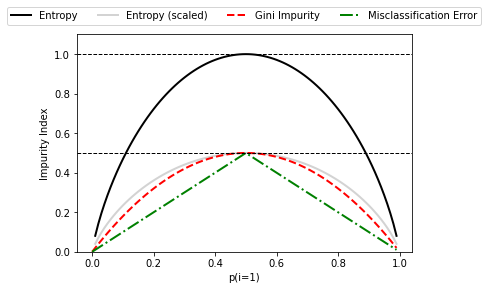

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [2]:
from sklearn import datasets
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [5]:
from sklearn.tree import DecisionTreeClassifier

<ipython-input-4-bf26f127896e>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


<function matplotlib.pyplot.show(close=None, block=None)>

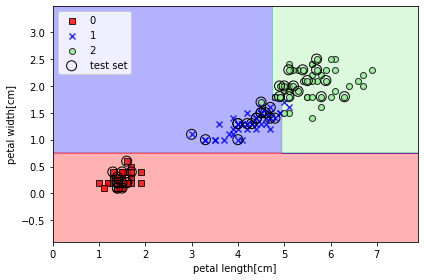

In [6]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)

tree.fit(X_train,y_train)
X_combined=np.vstack((X_train,X_test))
y_combined=np.hstack((y_train,y_test))

plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show

In [7]:
from graphviz import Source

In [8]:
dot_digraph="""
digraph graphname{
rankdir=LR;
a->b->c->e->f;
b->d
}
"""
s=Source(dot_digraph, filename='simple_digraph',format='png')
s.view()

'simple_digraph.png'

In [11]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

True

# 랜덤 포레스트로 여러 개의 결정 트리 연결
1. n개의 랜덤한 부트스트랩(bootstrap)샘플을 뽑는다(훈련 세트에서 중복을 허용하면서 랜덤하게 n개의 샘플을 선택
2. 부트스트랩 샘플에서 결정 트리를 학습한다. 각 노드에서 결정
#### 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택
#### 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할
3. 단계 1 ,2 를 k 번 반복
4. 각 트리의 예측을 모아 다수결 투표로 클래스 레이블을 할당한다. 

<ipython-input-4-bf26f127896e>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


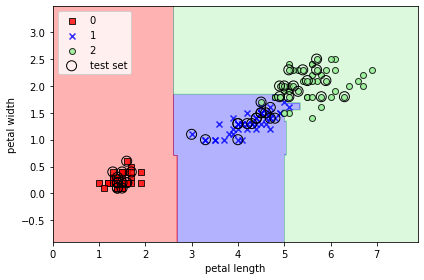

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=2)

forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

 n_estimator 매개변수로 25개의 결정ㅇ 트리를 사용, 노드를 분할하는 불순도 지표로는 지니 불순도를 사용, 작은 훈련 데이터셋에서 소규모 랜덤 포레스트를 훈련하지만 사용법을 보이기 위해 n_jobs매개변수를 사용 이 매개변수는 컴퓨터 멀티 코어를 사용해서 모델 훈련을 병렬화

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [35]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

In [36]:
from sklearn.neighbors import KNeighborsClassifier

유클리디안 거리

<ipython-input-4-bf26f127896e>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


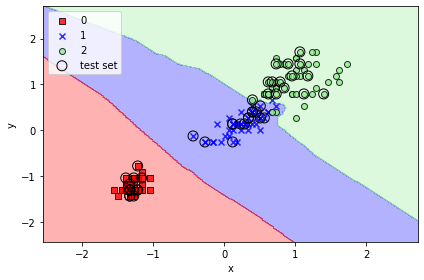

In [38]:
knn=KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# KNN알고리즘 단계
1. 숫자 k와 거리 측정 기준을 선택
2. 분류하려는 샘플에서 k개의 최근접 이웃을 찾는다.
3. 다수결 투표를 통해 클래스 레이블을 할당

맨해튼 거리

<ipython-input-4-bf26f127896e>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


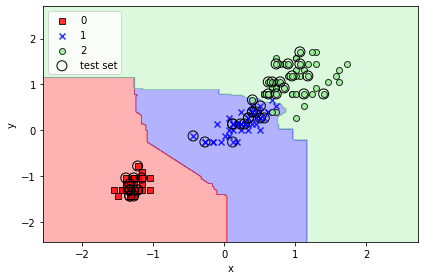

In [41]:
knn=KNeighborsClassifier(n_neighbors=5, p=1,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()